In [443]:
# Dependencies
import pandas as pd
import os
import pymysql
pymysql.install_as_MySQLdb()
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

from sqlalchemy import create_engine, inspect, Column, Integer, String
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()
from sqlalchemy.sql import func
from flask import Flask, jsonify

In [302]:
# STEP 3 - CLIMATE ANALYSIS AND EXPLORATION
# Choose start and end date of trip - must be 3-15 days in total
# Start date - 1/1/17
# End date - 1/10/17

In [303]:
# Connect to database
engine = create_engine('sqlite:///hawaii.sqlite')

# Create tables in database
Base.metadata.create_all(engine)

# Start session
session = Session(bind=engine)

In [304]:
# Declare Base using 'automap_base()'
Base = automap_base()

In [305]:
# Use Base class to reflect database tables
Base.prepare(engine, reflect=True)

In [306]:
# Classes mapped in database
Base.classes.keys()

['measurements', 'stations']

In [307]:
inspector = inspect(engine)
inspector.get_table_names()

['measurements', 'stations']

In [308]:
file_name = 'clean_him.csv'
clean_him_df = pd.read_csv(file_name)
clean_him_df.to_sql(con=engine, name='measurements', if_exists='replace')

file_name2 = 'clean_hs.csv'
clean_hs_df = pd.read_csv(file_name2)
clean_hs_df.to_sql(con=engine, name='stations', if_exists='replace')

In [309]:
# Assign measurements variable to 'measurements'
HI_measurements = Base.classes.measurements

list(HI_measurements.__table__.columns)

[Column('id', INTEGER(), table=<measurements>, primary_key=True, nullable=False),
 Column('station', VARCHAR(), table=<measurements>),
 Column('date', INTEGER(), table=<measurements>),
 Column('prcp', INTEGER(), table=<measurements>),
 Column('tobs', INTEGER(), table=<measurements>)]

In [310]:
# Query to retrieve last 12 months of data selecting only 'date' and 'prcp' values
measurements_query = (session
                      .query(HI_measurements.date, 
                             HI_measurements.prcp)
                      .filter(HI_measurements.date <= '2017-08-23')
                      .filter(HI_measurements.date >= '2016-08-23')
                      .all())

for row in measurements_query:
    print(row)

('2016-08-23', 0.0)
('2016-08-24', 0.08)
('2016-08-25', 0.08)
('2016-08-26', 0.0)
('2016-08-27', 0.0)
('2016-08-28', 0.01)
('2016-08-29', 0.0)
('2016-08-30', 0.0)
('2016-08-31', 0.13)
('2016-09-01', 0.0)
('2016-09-02', 0.0)
('2016-09-03', 0.0)
('2016-09-04', 0.03)
('2016-09-07', 0.05)
('2016-09-08', 0.0)
('2016-09-09', 0.03)
('2016-09-10', 0.0)
('2016-09-11', 0.05)
('2016-09-12', 0.0)
('2016-09-13', 0.02)
('2016-09-14', 1.32)
('2016-09-15', 0.42)
('2016-09-16', 0.06)
('2016-09-17', 0.05)
('2016-09-18', 0.0)
('2016-09-19', 0.0)
('2016-09-20', 0.0)
('2016-09-21', 0.0)
('2016-09-22', 0.02)
('2016-09-23', 0.0)
('2016-09-24', 0.0)
('2016-09-25', 0.0)
('2016-09-26', 0.06)
('2016-09-27', 0.02)
('2016-09-28', 0.0)
('2016-09-29', 0.0)
('2016-09-30', 0.0)
('2016-10-01', 0.0)
('2016-10-02', 0.0)
('2016-10-03', 0.0)
('2016-10-04', 0.0)
('2016-10-05', 0.0)
('2016-10-06', 0.0)
('2016-10-07', 0.0)
('2016-10-08', 0.0)
('2016-10-09', 0.0)
('2016-10-10', 0.0)
('2016-10-11', 0.0)
('2016-10-12', 0.0)
('20

('2017-07-18', 0.0)
('2017-07-19', 0.09)
('2017-07-20', 0.0)
('2017-07-21', 0.0)
('2017-07-22', 0.12)
('2017-07-23', 0.07)
('2017-07-24', 1.19)
('2017-07-25', 0.12)
('2017-07-26', 0.02)
('2017-07-27', 0.0)
('2017-07-28', 0.14)
('2017-07-29', 0.02)
('2017-08-01', 0.12)
('2017-08-02', 0.05)
('2017-08-03', 0.01)
('2017-08-04', 0.04)
('2017-08-06', 0.0)
('2017-08-07', 0.0)
('2017-08-08', 0.1)
('2017-08-09', 0.0)
('2017-08-10', 0.0)
('2017-08-11', 0.0)
('2017-08-14', 0.01)
('2017-08-15', 0.0)
('2017-08-16', 0.0)
('2017-08-17', 0.0)
('2017-08-18', 0.0)
('2017-08-19', 0.0)
('2017-08-20', 0.01)
('2017-08-21', 0.02)
('2017-08-23', 0.0)
('2016-08-25', 0.0)
('2016-08-26', 0.04)
('2016-08-30', 0.02)
('2016-09-16', 0.0)
('2016-09-20', 0.0)
('2016-09-22', 0.06)
('2016-09-23', 0.0)
('2016-09-28', 0.0)
('2016-09-29', 0.04)
('2016-10-06', 0.07)
('2016-10-25', 0.4)
('2016-10-26', 0.2)
('2016-11-09', 0.0)
('2016-11-14', 0.02)
('2016-12-08', 0.27)
('2016-12-12', 0.02)
('2016-12-21', 0.06)
('2017-01-17', 0

In [430]:
# Load the query results into a Pandas DataFrame and set the index to the date column.
mq_df = pd.DataFrame(measurements_query, columns=['date', 'prcp'])
#mq_df = mq_df.sort_values(by=['date'])
#mq_df = mq_df.reset_index(drop=True)

mq_df.set_index('date', inplace=True)
mq_df.head()

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


In [432]:
# Unpack 'prcp' column into own list
prcp_result = [(prcp[1]) for prcp in measurements_query]
#prcp_result = mq_df['prcp']

# Unpack 'date' column into own list
date_result = [(date[0]) for date in measurements_query]
#date_result = mq_df['date']

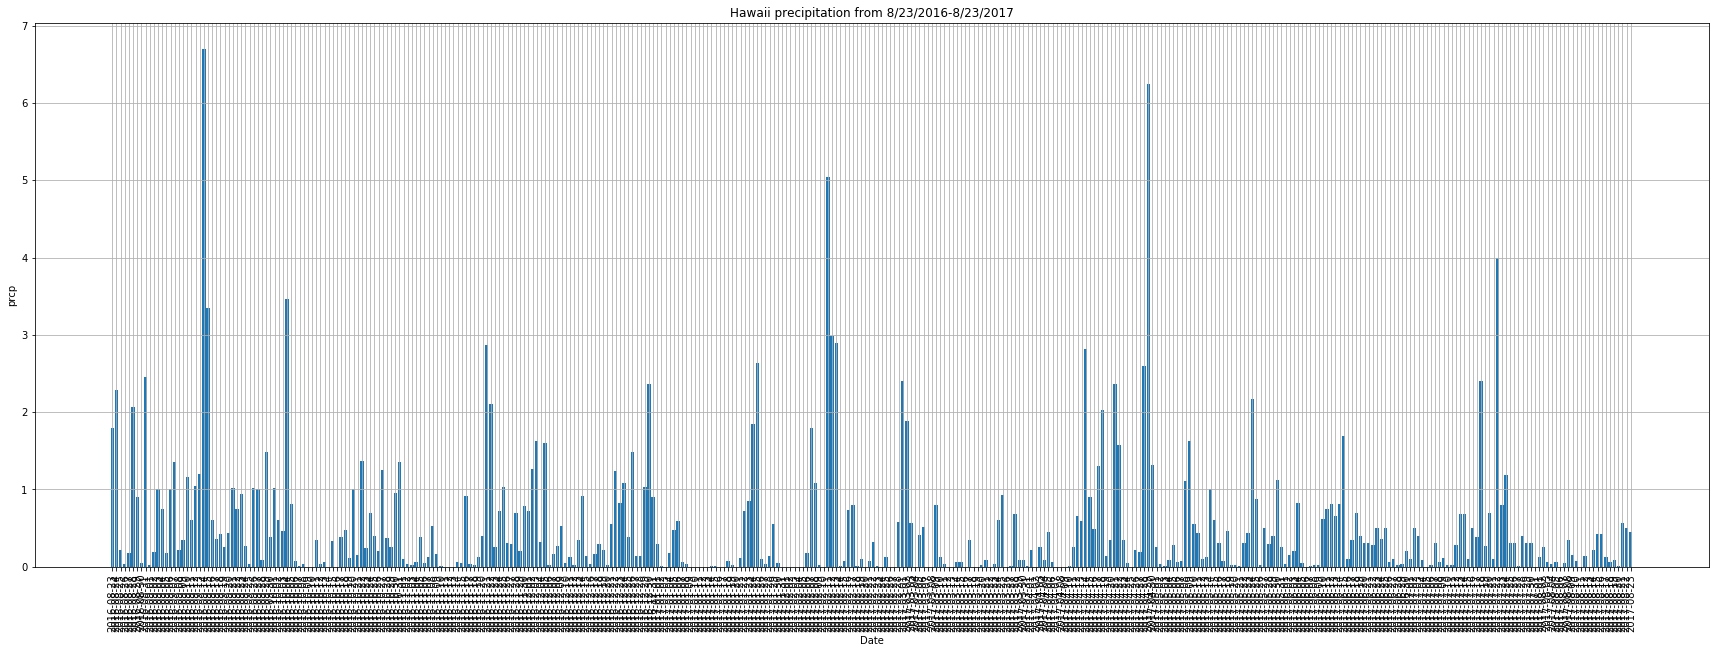

In [439]:
# Plot 'date' vs 'prcp'
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
plt.bar(date_result, prcp_result)
plt.xlabel('Date')
plt.ylabel('prcp')
plt.title('Hawaii precipitation from 8/23/2016-8/23/2017')
plt.grid()
plt.show()

In [314]:
# STATION ANALYSIS
HI_stations = Base.classes.stations

list(HI_stations.__table__.columns)

[Column('id', INTEGER(), table=<stations>, primary_key=True, nullable=False),
 Column('station', VARCHAR(), table=<stations>),
 Column('name', VARCHAR(), table=<stations>),
 Column('latitude', INTEGER(), table=<stations>),
 Column('longitude', INTEGER(), table=<stations>),
 Column('elevation', INTEGER(), table=<stations>)]

In [317]:
# Calculate total number of stations
stations_count = (session
                  .query(HI_stations.station)
                  .count())
stations_count

9

In [337]:
# Most active stations - list by station and counts by descending order
# Which station has the highest number of observations?
active_stations = (session
                   .query(HI_measurements.station, func.count(HI_measurements.date))
                   .order_by(func.count(HI_measurements.date).desc())
                   .group_by(HI_measurements.station)
                   .all())
active_stations

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [344]:
# Query to retrieve last 12 months of data selecting only 'date' and 'tobs' values
tobs_query = (session
              .query(HI_measurements.date, 
                     HI_measurements.station,
                     HI_measurements.tobs)
              .filter(HI_measurements.date <= '2017-08-23')
              .filter(HI_measurements.date >= '2016-08-23')
              .order_by(HI_measurements.date)
              .all())

for row in tobs_query:
    print(row)

('2016-08-23', 'USC00519397', 81)
('2016-08-23', 'USC00513117', 76)
('2016-08-23', 'USC00514830', 80)
('2016-08-23', 'USC00519523', 80)
('2016-08-23', 'USC00519281', 77)
('2016-08-23', 'USC00516128', 74)
('2016-08-24', 'USC00519397', 79)
('2016-08-24', 'USC00513117', 76)
('2016-08-24', 'USC00514830', 80)
('2016-08-24', 'USC00519523', 79)
('2016-08-24', 'USC00519281', 77)
('2016-08-24', 'USC00516128', 74)
('2016-08-25', 'USC00519397', 80)
('2016-08-25', 'USC00513117', 77)
('2016-08-25', 'USC00514830', 81)
('2016-08-25', 'USC00517948', 81)
('2016-08-25', 'USC00519523', 80)
('2016-08-25', 'USC00519281', 80)
('2016-08-25', 'USC00516128', 77)
('2016-08-26', 'USC00519397', 79)
('2016-08-26', 'USC00513117', 78)
('2016-08-26', 'USC00514830', 81)
('2016-08-26', 'USC00517948', 81)
('2016-08-26', 'USC00519523', 84)
('2016-08-26', 'USC00519281', 80)
('2016-08-27', 'USC00519397', 77)
('2016-08-27', 'USC00513117', 73)
('2016-08-27', 'USC00514830', 81)
('2016-08-27', 'USC00519523', 81)
('2016-08-27',

('2017-01-26', 'USC00514830', 74)
('2017-01-26', 'USC00517948', 70)
('2017-01-26', 'USC00519523', 74)
('2017-01-26', 'USC00519281', 70)
('2017-01-26', 'USC00516128', 67)
('2017-01-27', 'USC00519397', 65)
('2017-01-27', 'USC00513117', 63)
('2017-01-27', 'USC00514830', 74)
('2017-01-27', 'USC00517948', 65)
('2017-01-27', 'USC00519523', 74)
('2017-01-27', 'USC00519281', 66)
('2017-01-27', 'USC00516128', 69)
('2017-01-28', 'USC00519397', 64)
('2017-01-28', 'USC00513117', 71)
('2017-01-28', 'USC00514830', 76)
('2017-01-28', 'USC00519281', 65)
('2017-01-28', 'USC00516128', 64)
('2017-01-29', 'USC00519397', 67)
('2017-01-29', 'USC00513117', 71)
('2017-01-29', 'USC00519281', 69)
('2017-01-29', 'USC00516128', 67)
('2017-01-30', 'USC00519397', 67)
('2017-01-30', 'USC00513117', 69)
('2017-01-30', 'USC00517948', 68)
('2017-01-30', 'USC00519523', 70)
('2017-01-30', 'USC00519281', 68)
('2017-01-30', 'USC00516128', 66)
('2017-01-31', 'USC00519397', 68)
('2017-01-31', 'USC00513117', 69)
('2017-01-31',

In [349]:
# Load the query results into a Pandas DataFrame and set the index to the date column.
tobs_df = pd.DataFrame(tobs_query, columns=['date','station','tobs'])
#tobs_df.set_index('date', inplace=True)
#tobs_df.head()

tobs_only = tobs_df['tobs']

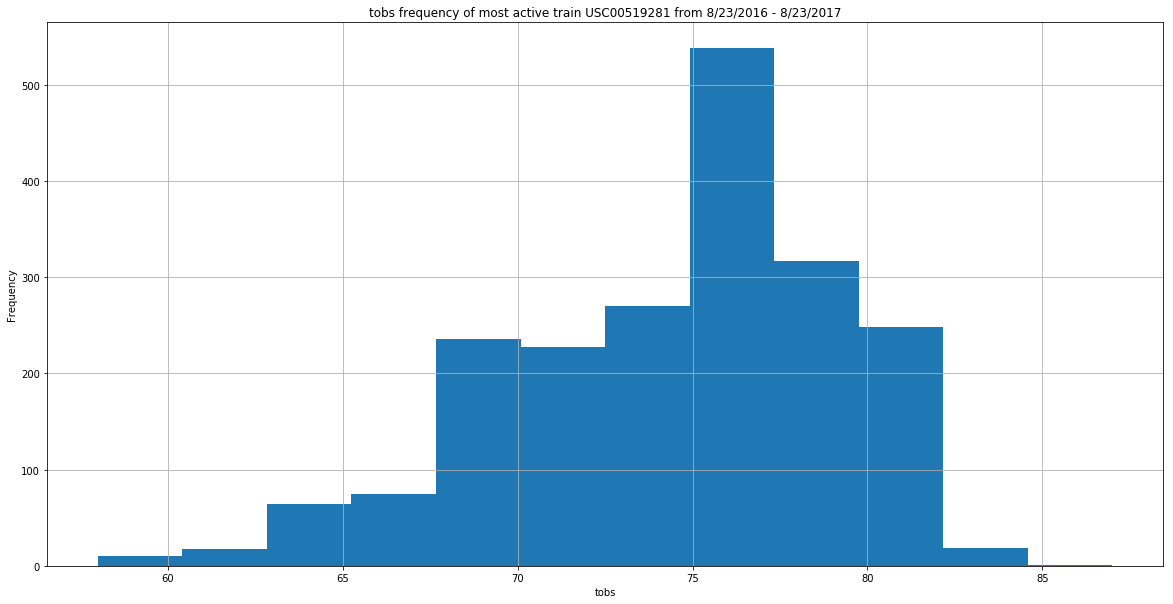

In [352]:
# Plot results using a histogram with bins=12 (Tobs vs. frequency)
plt.hist(tobs_only, bins=12)
plt.xlabel('tobs')
plt.ylabel('Frequency')
plt.title('tobs frequency of most active train USC00519281 from 8/23/2016 - 8/23/2017')
plt.grid()
plt.show()

In [401]:
# TEMPERATURE ANALYSIS
# Write a function called calc_temps that will accept a start date and end date in the 
# format %Y-%m-%d and return the minimum, average, and maximum temperatures for that range of dates.
def calc_temps(start_date, end_date):
    
    start_date_new = datetime.datetime.strptime(start_date, "%Y-%m-%d") - datetime.timedelta(days=365)
    end_date_new = datetime.datetime.strptime(end_date, "%Y-%m-%d") - datetime.timedelta(days=365)
    
    # Start date = 1/1/2017
    # End date = 1/10/2017
    
    # Use the calc_temps function to calculate the min, avg, and max temperatures for your trip 
    # using the matching dates from the previous year 
    # (i.e. use "2017-01-01" if your trip start date was "2018-01-01")
    tobs_query_new = (session
                      .query(HI_measurements.tobs)
                      .filter(HI_measurements.date.between(start_date_new, end_date_new))
                      .all())
    
    # Put query into DataFrame so that you can graph using pandas
    tqn_df = pd.DataFrame(tobs_query_new)
    
    # Calculate min, avg, max of temperature (including error bar of temp (yerr))
    min_temp = tqn_df.min()
    max_temp = tqn_df.max()
    avg_temp = tqn_df.mean()
    yerr_temp = max_temp - min_temp
    
    # Graph using bar chart: avg temp = bar height
    plt.figure(figsize=(4, 8))
    plt.tick_params(bottom='off', top='off', labelbottom='off')
    plt.bar(1, avg_temp, yerr=yerr_temp)
    plt.ylabel('Temp (F)')
    plt.title('Trip average temp')
    plt.grid()
    plt.show()

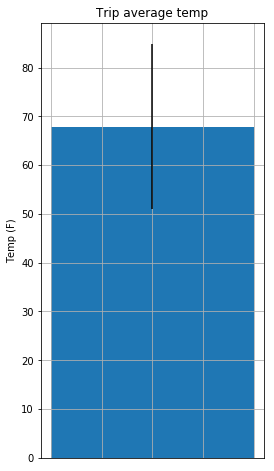

<function __main__.calc_temps>

In [402]:
# Query for my trip dates
start_date = '2018-01-01'
end_date = '2018-01-10'

calc_temps(start_date, end_date)
calc_temps

In [440]:
# STEP 4 - CLIMATE APP
# Design a Flask api based on the queries that you have just developed

In [442]:
# Routes
# /api/v1.0/precipitation
# Query for the dates and temperature observations from the last year
app = Flask(__name__)

@app.route('/api/v1.0/precipitation') 
def precipitation():
    print("Server received request for 'Precipitation' page...")
    return "Here are the dates and temperature observations from last year!"

    last_year_temp = (session
                      .query(HI_measurements.tobs)
                      .filter(HI_measurements.date <= '2017-08-23')
                      .filter(HI_measurements.date >= '2016-08-23')
                      .order_by(HI_measurements.date)
                      .all())

    # Convert the query results to a Dictionary using date as the key and tobs as the value
    dates_and_temp = []
    for date in last_year_temp:
        date_dict ={}
        date_dict['date'] = HI_measurements.date
        date_dict['temperature'] = HI_measurements.tobs
        dates_and_temp.append(date_dict)
    
# Return the json representation of your dictionary
    return jsonify(dates_and_temp)

In [445]:
# /api/v1.0/stations
# Return a json list of stations from the dataset
@app.route('/api/v1.0/stations') 
def stations():
    print("Server received request for 'Stations' page...")
    return "Here is the list of stations from the dataset!"

    stations_query = (session
                      .query(HI_stations.stations)
                      .all())
    
    return jsonify(stations_query)

In [446]:
# /api/v1.0/tobs
# Return a json list of Temperature Observations (tobs) for the previous year
@app.route('/api/v1.0/tobs') 
def tobs():
    print("Server received request for 'Temperature Observations' page...")
    return "Here is the list of Temperature Observations (tobs) for the previous year!"
    
    tobs_last_year = (session
                      .query(HI_measurements.tobs)
                      .filter(HI_measurements.date <= '2017-08-23')
                      .filter(HI_measurements.date >= '2016-08-23')
                      .order_by(HI_measurements.tobs)
                      .all())
    
    return jsonify(tobs_last_year)

In [448]:
# /api/v1.0/<start> and /api/v1.0/<start>/<end>
# Return a json list of the minimum temperature, the average temperature, and 
# the max temperature for a given start or start-end range.
@app.route('/api/v1.0/<start>)') 
def tobs_start():
    print("Server received request for 'Min Temp, Avg Temp, Max Temp of a given start' page...")
    return "Here is the list of Temperature information for the a given date!"
    
    start = HI_measurements.date <= '2010-01-01'
    end = HI_measurements.date >= '2017-08-23'

    # When given the start only, calculate TMIN, TAVG, and TMAX for all dates greater 
    # than and equal to the start date
    tobs_start_only = (session
                       .query(HI_measurements.tobs)
                       .filter(HI_measurements.date.between(start, '2017-08-23'))
                       .all())
    
    tso_df = pd.DataFrame(tobs_start_only)
    
    tmin = tso_df.min()
    tmax = tso_df.max()
    tavg = tso_df.avg()
    

@app.route('/api/v1.0/<start>/<end>') 
def tobs_given_range():
    
    print("Server received request for 'Min Temp, Avg Temp, Max Temp of a given start or date range' page...")
    return "Here is the list of Temperature information for the a given date range!"
    
    # When given the start and the end date, calculate the TMIN, TAVG, and TMAX for dates between the start 
    # and end date inclusive.
    tobs_given_range = (session
                        .query(HI_measurements.tobs)
                        .filter(HI_measurements.date.between(start, end))
                        .all())
    
    # Convert to Dataframe to calculate TMIN, TAVG, TMAX
    tgr_df = pd.DataFrame(tobs_given_range)
    
    t2min = tgr_df.min()
    t2max = tgr_df.max()
    t2avg = tgr_df.avg()